(image_file_formats:aicsimagio=)
# 使用AICSImageIO读取文件

[AICSImageIO库](https://github.com/AllenCellModeling/aicsimageio)旨在简化读取显微镜图像数据的过程。

要安装该库，需要执行以下命令。

```
pip install aicsimageio
```

如果需要读取特定的专有文件格式，则必须安装额外的软件。[查看文档以获取详细信息](https://github.com/AllenCellModeling/aicsimageio#extra-format-installation)。

In [1]:
from aicsimageio import AICSImage

from skimage.io import imshow

首先，我们创建一个`AICSImage`对象来查看它是否理解我们的文件格式。在以下示例中，我们读取了一个之前用ImageJ保存的[OME Tif](https://docs.openmicroscopy.org/ome-model/5.6.3/ome-tiff/)文件。

作为示例，我们这里使用的是[Célia Baroux等人(苏黎世大学)](https://datadryad.org/stash/dataset/doi:10.5061/dryad.02v6wwq2c)分享的一张图像，该图像为了演示目的而重新保存。

In [2]:
aics_image = AICSImage("../../data/EM_C_6_c0.ome.tif")
aics_image

Attempted file (C:/structure/code/BioImageAnalysisNotebooks/data/EM_C_6_c0.ome.tif) load with reader: aicsimageio.readers.bfio_reader.OmeTiledTiffReader failed with error: No module named 'bfio'
C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\ome_types\_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


<AICSImage [Reader: OmeTiffReader, Image-is-in-Memory: False]>

这个对象已经可以给我们提供基本信息，如图像大小/形状、维度以及维度名称和顺序。

In [3]:
aics_image.shape

(1, 1, 256, 256, 256)

In [4]:
aics_image.dims

<Dimensions [T: 1, C: 1, Z: 256, Y: 256, X: 256]>

In [5]:
aics_image.dims.order

'TCZYX'

从这个对象中，我们还可以将像素作为numpy数组检索。

In [6]:
np_image = aics_image.get_image_data("ZYX", T=0)
np_image.shape

(256, 256, 256)

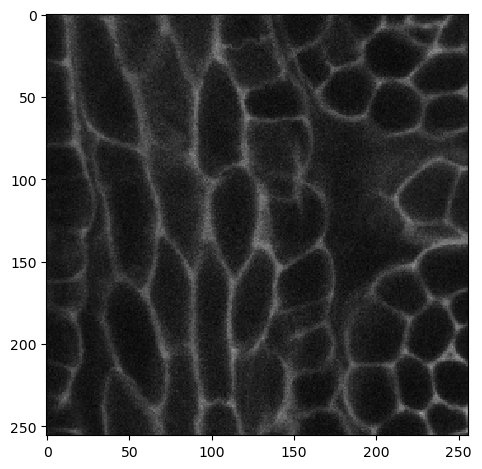

In [7]:
imshow(np_image[128])

## 读取元数据

在处理显微镜图像数据时，了解元数据很重要，例如体素大小。为了以适当的物理单位进行体积测量，我们需要知道X、Y和Z方向上一个体素的大小。

In [8]:
aics_image.physical_pixel_sizes

PhysicalPixelSizes(Z=0.16784672897196262, Y=0.16776018346253663, X=0.16776018346253663)

可以定义一个辅助函数来以Z/Y/X格式读取体素大小。

In [9]:
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

In [10]:
get_voxel_size_from_aics_image(aics_image)

(0.16784672897196262, 0.16776018346253663, 0.16776018346253663)

## 读取CZI文件

如果额外安装了[`aicspylibczi`库](https://pypi.org/project/aicspylibczi/)，也可以使用AICSImageIO打开CZI文件。

In [11]:
czi_image = AICSImage("../../data/PupalWing.czi")
czi_image.shape

(1, 1, 80, 520, 692)

In [12]:
np_czi_image = czi_image.get_image_data("ZYX", T=0)
np_czi_image.shape

(80, 520, 692)

In [13]:
get_voxel_size_from_aics_image(czi_image)

(1.0, 0.20476190476190476, 0.20476190476190476)

## 读取LIF文件

如果额外安装了[`readlif`库](https://pypi.org/project/readlif/)，也可以使用AICSImageIO读取LIF图像。

In [14]:
lif_image = AICSImage("../../data/y293-Gal4_vmat-GFP-f01.lif")
lif_image.shape

(1, 2, 86, 500, 616)

In [15]:
np_lif_image = lif_image.get_image_data("ZYX", T=0)
np_lif_image.shape

(86, 500, 616)

In [16]:
get_voxel_size_from_aics_image(lif_image)

(1.0070810588235295, 0.46827875751503006, 0.46827869918699183)